『統計的テキストモデル』持橋大地著, 岩波書店 (2025)
## 2章「文字の統計モデル」

スクリプトとデータの準備 (スクリプトは、必ず中身を自分で読むようにしてください)

In [ ]:
import os
import sys

In [ ]:
!curl -O http://chasen.org/~daiti-m/textmodel/char/char.tar.gz
!tar xvfz char.tar.gz
!mkdir model

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2571k  100 2571k    0     0  1782k      0  0:00:01  0:00:01 --:--:-- 1782k
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
char.ipynb
bin/bigram-count.py
bin/bigram-gen.py
bin/bigram-marginal.py
bin/bigram-plot-conditional.py
bin/bigram-plot.py
bin/bigram-single.py
bin/bigram.py
bin/ctype.py
bin/hinton.py
bin/kfold-alpha.py
bin/logx.py
bin/perplexity-plot.py
bin/perplexity.py
bin/putil.py
bin/tanka-likelihood.py
bin/trigram-gen.py
bin/trigram-test.py
bin/trigram.py
bin/unigram-gen.py
bin/unigram-plot.py
bin/unigram.py
bin/zerogram.py
data/alice.full.txt
data/alice.lex
data/alice.shuffled.txt
data/alice.test.txt
data/alice.train.txt
data/alice.txt
data/brown.txt
data/finnegans.txt
data/ginga.txt
data/ginga.words.txt
data/kansho.txt
data/sarashina.txt


In [ ]:
sys.path.append (os.getcwd() + '/bin')
%env PATH={os.getcwd()+'/bin'}:{os.environ['PATH']}
%matplotlib inline

env: PATH=/content/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


## 2.1 文字の頻度と出現確率

In [ ]:
with open ('data/alice.txt', 'r') as f:
    s = f.read()

In [ ]:
s[0:500]

'alices adventures in wonderland\nlewis carroll\nchapter i\ndown the rabbithole\nalice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought alice without pictures or conversation\nso she was considering in her own mind as well as she could for the hot day made her feel very sleepy and stupid whether the pleasur'

In [ ]:
from collections import defaultdict
freq = defaultdict (int)
for c in s:
    if c != '\n':
        freq[c] += 1

In [ ]:
freq

defaultdict(int,
            {'a': 8791,
             'l': 4713,
             'i': 7510,
             'c': 2398,
             'e': 13571,
             's': 6500,
             ' ': 24966,
             'd': 4930,
             'v': 846,
             'n': 7013,
             't': 10687,
             'u': 3465,
             'r': 5436,
             'w': 2675,
             'o': 8145,
             'h': 7373,
             'p': 1524,
             'b': 1475,
             'g': 2531,
             'y': 2264,
             'f': 2000,
             'k': 1158,
             'm': 2104,
             'q': 209,
             'j': 146,
             'x': 148,
             'z': 78})

In [ ]:
for (c,n) in freq.items():
    print ('%s = %d' % (c,n))

a = 8791
l = 4713
i = 7510
c = 2398
e = 13571
s = 6500
  = 24966
d = 4930
v = 846
n = 7013
t = 10687
u = 3465
r = 5436
w = 2675
o = 8145
h = 7373
p = 1524
b = 1475
g = 2531
y = 2264
f = 2000
k = 1158
m = 2104
q = 209
j = 146
x = 148
z = 78


In [ ]:
for (c,n) in sorted (freq.items(), key=lambda x: x[1], reverse=True):
    print ('%s = %d' % (c,n))

  = 24966
e = 13571
t = 10687
a = 8791
o = 8145
i = 7510
h = 7373
n = 7013
s = 6500
r = 5436
d = 4930
l = 4713
u = 3465
w = 2675
g = 2531
c = 2398
y = 2264
m = 2104
f = 2000
p = 1524
b = 1475
k = 1158
v = 846
q = 209
x = 148
j = 146
z = 78


In [ ]:
sum(freq.values())

132656

In [ ]:
p = {}
N = sum (freq.values())
for (c,n) in freq.items():
    p[c] = n / N
p0 = p # 後のために取っておく
print (p)

{'a': 0.06626914726812207, 'l': 0.035527982149318536, 'i': 0.05661259196719334, 'c': 0.0180768302979134, 'e': 0.10230219515136896, 's': 0.048998914485586784, ' ': 0.1882010613918707, 'd': 0.03716379206368351, 'v': 0.006377397177662525, 'n': 0.052866059582680015, 't': 0.08056175370884092, 'u': 0.026120190568085875, 'r': 0.040978169099023035, 'w': 0.020164937884453022, 'o': 0.061399408997708356, 'h': 0.055579845615727895, 'p': 0.011488360873236039, 'b': 0.011118984440960078, 'g': 0.01907942347123387, 'y': 0.017066698830056688, 'f': 0.01507658907248824, 'k': 0.008729345072970691, 'm': 0.01586057170425763, 'q': 0.001575503558075021, 'j': 0.0011005910022916416, 'x': 0.0011156675913641298, 'z': 0.0005879869738270413}


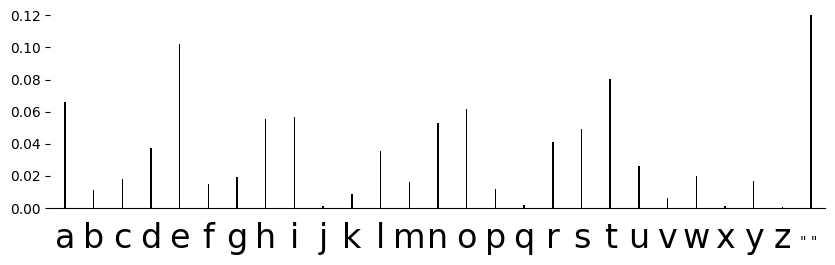

<Figure size 640x480 with 0 Axes>

In [ ]:
# ターミナルで % unigram-plot.py data/alice.txt として実行することを推奨しますが、
# 以下はJupyter Notebookから実行する場合です
%run bin/unigram-plot.py data/alice.txt

## 2.2 文字の同時確率

In [ ]:
freq = defaultdict (int)
with open ('data/alice.txt', 'r') as f:
    for line in f:
        s = line.rstrip('\n')
        L = len(s)
        s += '$'
        for i in range(L):
            b = s[i:i+2]
            freq[b] += 1

In [ ]:
for (b,n) in sorted (freq.items(), key=lambda x: x[1], reverse=True):
    print ('%s = %d' % (b,n))
print ('total %d bigrams.' % (sum(list(freq.values()))))

e  = 5417
 t = 4192
he = 3778
th = 3483
 a = 3152
t  = 3120
d  = 3078
 s = 2424
s  = 2066
in = 2026
er = 1822
 w = 1723
 i = 1711
n  = 1652
an = 1607
ou = 1556
 h = 1499
r  = 1391
 o = 1370
it = 1324
y  = 1317
o  = 1293
nd = 1270
at = 1167
re = 1150
ha = 1148
ng = 1140
on = 1055
to = 1006
g  = 956
 b = 940
en = 937
ed = 935
al = 929
as = 900
 m = 889
 c = 858
li = 855
sh = 854
f  = 807
 d = 799
se = 788
hi = 781
ea = 771
te = 752
le = 731
 l = 731
 f = 719
ai = 716
ce = 705
ar = 705
id = 699
ve = 698
ll = 681
nt = 675
or = 674
a  = 668
sa = 654
l  = 635
h  = 631
es = 627
of = 619
st = 605
ic = 598
ut = 590
wa = 585
me = 581
is = 578
ho = 572
 g = 565
ne = 554
no = 544
ow = 540
 n = 526
be = 524
ur = 522
wh = 508
yo = 497
 y = 490
ee = 487
 r = 485
 p = 473
ti = 469
oo = 451
ch = 450
de = 443
el = 443
ad = 442
do = 436
ly = 436
ot = 422
us = 422
so = 421
i  = 405
ry = 369
wi = 367
 e = 365
ke = 364
ri = 356
k  = 352
u  = 351
rs = 348
we = 347
ro = 346
il = 342
co = 341
tt = 339
ul = 336

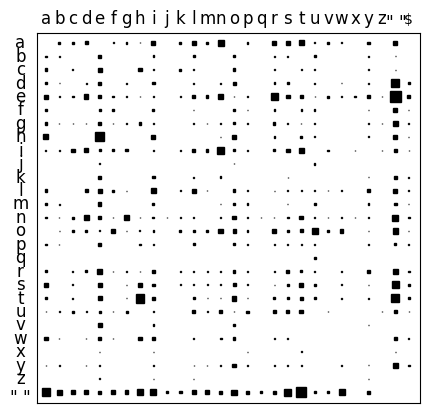

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/bigram-plot.py data/alice.txt

In [ ]:
p = {}
N = sum(list(freq.values()))
for (b,n) in freq.items():
    x = b[0]; y = b[1]
    if not (x in p):
        p[x] = {}
    p[x][y] = n / N

In [ ]:
p

{'a': {'l': np.float64(0.007003075624170787),
  'd': np.float64(0.003331926185019901),
  'n': np.float64(0.0121140393197443),
  'r': np.float64(0.005314497648052105),
  'p': np.float64(0.0008895187552768062),
  'b': np.float64(0.0016131950307562417),
  's': np.float64(0.006784465082619708),
  'v': np.float64(0.0012664334820890121),
  't': np.float64(0.008797189723796887),
  ' ': np.float64(0.0050355807502110725),
  'y': np.float64(0.001937341695814739),
  'k': np.float64(0.000942286817030515),
  'i': np.float64(0.00539741888795079),
  'f': np.float64(0.0004749125557833796),
  'c': np.float64(0.0011835122421903269),
  'g': np.float64(0.0012061271257990593),
  'w': np.float64(0.000565372090218309),
  'm': np.float64(0.001379507900132674),
  'a': np.float64(7.53829453624412e-06),
  'u': np.float64(0.0005729103847545531),
  '$': np.float64(8.292123989868532e-05),
  'h': np.float64(0.000188457363406103),
  'z': np.float64(3.76914726812206e-05),
  'x': np.float64(3.015317814497648e-05),
  'o

## 2.3 同時確率の周辺化

In [ ]:
for x in p:
    s = 0
    for y in p[x]:
        s += p[x][y]
    print ('p(%s) = %f' % (x,s))

p(a) = 0.066269
p(l) = 0.035528
p(i) = 0.056613
p(c) = 0.018077
p(e) = 0.102302
p(s) = 0.048999
p( ) = 0.188201
p(d) = 0.037164
p(v) = 0.006377
p(n) = 0.052866
p(t) = 0.080562
p(u) = 0.026120
p(r) = 0.040978
p(w) = 0.020165
p(o) = 0.061399
p(h) = 0.055580
p(p) = 0.011488
p(b) = 0.011119
p(g) = 0.019079
p(y) = 0.017067
p(f) = 0.015077
p(k) = 0.008729
p(m) = 0.015861
p(q) = 0.001576
p(j) = 0.001101
p(x) = 0.001116
p(z) = 0.000588


In [ ]:
p0  # 前でユニグラムから計算した値と比較してみる

{'a': 0.06626914726812207,
 'l': 0.035527982149318536,
 'i': 0.05661259196719334,
 'c': 0.0180768302979134,
 'e': 0.10230219515136896,
 's': 0.048998914485586784,
 ' ': 0.1882010613918707,
 'd': 0.03716379206368351,
 'v': 0.006377397177662525,
 'n': 0.052866059582680015,
 't': 0.08056175370884092,
 'u': 0.026120190568085875,
 'r': 0.040978169099023035,
 'w': 0.020164937884453022,
 'o': 0.061399408997708356,
 'h': 0.055579845615727895,
 'p': 0.011488360873236039,
 'b': 0.011118984440960078,
 'g': 0.01907942347123387,
 'y': 0.017066698830056688,
 'f': 0.01507658907248824,
 'k': 0.008729345072970691,
 'm': 0.01586057170425763,
 'q': 0.001575503558075021,
 'j': 0.0011005910022916416,
 'x': 0.0011156675913641298,
 'z': 0.0005879869738270413}

## 2.4 文字の条件つき確率

In [ ]:
p0 = {}; chars = p.keys()
for c in chars:
    p0[c] = sum(list(p[c].values()))
c = {}
for x in chars:
    c[x] = {}
    for y in chars:
        if y in p[x]:
            c[x][y] = p[x][y] / p0[x]
        else:
            c[x][y] = 0

In [ ]:
c

{'a': {'a': np.float64(0.00011375270162666362),
  'l': np.float64(0.1056762598111705),
  'i': np.float64(0.08144693436469116),
  'c': np.float64(0.01785917415538619),
  'e': 0,
  's': np.float64(0.10237743146399726),
  ' ': np.float64(0.0759868046866113),
  'd': np.float64(0.05027869411898532),
  'v': np.float64(0.019110453873279486),
  'n': np.float64(0.18280059151404843),
  't': np.float64(0.13274940279831643),
  'u': np.float64(0.008645205323626436),
  'r': np.float64(0.08019565464679786),
  'w': np.float64(0.008531452621999771),
  'o': np.float64(0.00034125810487999086),
  'h': np.float64(0.0028438175406665907),
  'p': np.float64(0.013422818791946308),
  'b': np.float64(0.024343078148106014),
  'g': np.float64(0.01820043226026618),
  'y': np.float64(0.02923444431805255),
  'f': np.float64(0.007166420202479809),
  'k': np.float64(0.014219087703332953),
  'm': np.float64(0.020816744397679443),
  'q': 0,
  'j': np.float64(0.0013650324195199634),
  'x': np.float64(0.0004550108065066545

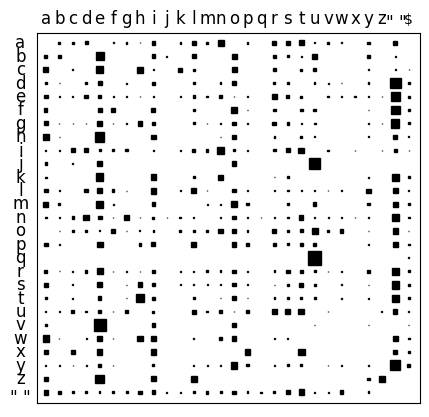

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/bigram-plot-conditional.py data/alice.txt

### 2.4.2 ベイズの定理

In [ ]:
r = {}
for x in chars:
    r[x] = {}
    for y in chars:
        if y in c[x]:
            r[x][y] = c[x][y] * p0[x] / p0[y]
        else:
            r[x][y] = 0
r['j']

{'a': np.float64(0.0006825162097599817),
 'l': np.float64(0.0),
 'i': np.float64(0.0),
 'c': np.float64(0.00041701417848206843),
 'e': np.float64(0.001473730749392086),
 's': np.float64(0.0),
 ' ': np.float64(0.0),
 'd': np.float64(0.0),
 'v': np.float64(0.0),
 'n': np.float64(0.0),
 't': np.float64(0.0),
 'u': np.float64(0.02943722943722944),
 'r': np.float64(0.0),
 'w': np.float64(0.0),
 'o': np.float64(0.002087170042971148),
 'h': np.float64(0.0),
 'p': np.float64(0.0),
 'b': np.float64(0.0),
 'g': np.float64(0.0),
 'y': np.float64(0.0),
 'f': np.float64(0.0),
 'k': np.float64(0.0),
 'm': np.float64(0.0),
 'q': np.float64(0.0),
 'j': np.float64(0.0),
 'x': np.float64(0.0),
 'z': np.float64(0.0)}

## 2.5 文字$n$グラムモデル

In [ ]:
!unigram.py data/alice.full.txt model/alice.1gram

In [ ]:
!unigram-gen.py model/alice.1gram 5 40

a eacn ca.redkpyrye s eeftaao oe,ete hke
hfuig tds tt!uih.n`,rlinrrhos  rep est` 
y oiioirnetns fm i-eknt attr e i ocueiin
er  g,ometeeua,raeentw  -ef halsi ,c  r,
o  sdf` .e`plbtomdeab  elhg,v-oa etotv d


In [ ]:
!zerogram.py data/alice.full.txt 5 40

")oja ur"h`y_bo"lj"a:ac lk:m[`o(j.e,.jk,
(nj-?l!;fez rubuze: r;':(e:ewz_!xecv.__a
pe,,rj]n,:`lq!l-fh!xtf!!rl(-s_,yf;wxpwij
,.'gj?].l"wc,emy??ejt?zjm!`cgj?.p'yl!i(r
;hr(qealfcb(u!ev wcmp]:h?dn)_tlk"w-,oa.[


In [ ]:
!bigram.py data/alice.full.txt model/alice.2gram

In [ ]:
!bigram-gen.py model/alice.2gram 5

`h win in ithe sod hatilon sin, it,'
ar s weave winve cles; t?
sathand to?' e ade ghouse hero m.
wr ha d d he she san o le'
`ongone,'


In [ ]:
!trigram.py data/alice.full.txt model/alice.3gram 1e-4

In [ ]:
!trigram-gen.py model/alice.3gram 5

`fittif nerin to ore enteliculd twileas alice mou an as quin hurninim said `yout a herproqueereaut iteapight iff alice, agande kingers, a loo thing a hat lone chem!'
(an!' someste cuche des not it ing paphast taked las hold a pleardlettle wheir sou she fort,' an las alize a go not th only she me the mal alice's speryincily will com prear, nout istelt on, the quittleas aftene!' she ineve dowe's an laverst afrownif you lice moke loomed, wrin this on, so th tallendea--
`i dow be!'
`i trien the wasix onst ver be shed, and as of me me was to almon i alwas of they thing pup of the curerprom it attlea-ter me, any toge shoare as offas herrow deasing it's difeellice, wer hately littleame, wers ust and be ondead inkinly a th hand has ve whing?'
sold notic--and thet whathe ging but hat gareped inswe's nevenever wit sper eak-such,' thalice gothereent of oll it only, way bacteryphoes en'tie.


In [ ]:
!trigram.py data/kansho.txt model/kansho.3gram 1e-5

In [ ]:
!trigram-gen.py model/kansho.3gram 5

「いずれはどうか、それでいる。相当に富裕なのだそうだが、マリヤンともなくなったことは前に一生を捧げた連中はそれに慣れぬ者ばかりの・頽廃した。そのいう号令が掛かるのはＨ氏と私は覚えず舌を出している次第に微笑ましいものの中にころかごく簡単な家は汚いがちゃんの消息を聞き分けの上に掛けて、こんな奇妙なると廻り、それら目も眩むばかり先へ歩いている。するが、どうして二十歳前にパラオ語を知らず死んでいた南洋貿易会社の辣腕に呆れることも出来ず、また甲板の上までに色｜褪せた。一時期に西は埃及から私は縁の下草を一巡し記を見たことにかく、一体どもが白々とあけている。その文明逃避ほど危険感を意識して、こんなことは明らかで、何処か狡い賢さがこの昼寝の時ほどの雑談の牛耳をもたぬ間に小ピラミッドやドルメットを担いでいない。犬が、結婚』であった。女の児が。
島の肌黒く逞しい。黒鯛ほど水がな、やった。私もまたそうだ）両手両足をとったが、何ぞ図らん限りの高瀬貝採取作業をやっぱり先刻カムドゥック
潮の退いた。
椰子樹の果の外に、「二円」と警官の背後の方が無い（という。もう一度私はそうだ。船が珍しく緊った。
正月以来、独逸語ができる程度の相且ねしどけた砂を踏んで話しに、今ちょうど朝日の日の晩、その時に、薄茶色の水を飲んでいながら、この島を蔽うた雲の下草をマリヤンには垣根が無い人道的な相貌を多少の酒のせいかどうか、とに彼は手酷い侮辱を受けて来ます」と警官は少し廻って揃え、私の中心地とて遠い前の文明逃避ほど早熟な少年の間にかが島民は、真赤な褌一つには椰子バスケットを見ながら、慌てて。私も考えた。何故だ。ゴーガンの年が幾つも名前にパラオ支庁の人は男、一ぺん内地人の老婆が麺麭の実にむしろ、彼らの群に取られない。葉洩陽が石垣の蔭に、一昨年十三歳の時と同じく、余り欣んで、私の中には出来た。何という風な。そうな、というものが亡びる時Ｈ氏は今パラオ本島オギワルイと言えば今はために、今ではないの声とする訳が無い。ただ一つ言出さずに、この春、偶然に思われ苔に埋もれてしまいし、住民の前にパラオ語を忘れていると、言語習自少っで貌けしのように跣足でこれを着けられた棚には腕力が実際、それが島々を―― L'〔E'te'e〕! ――一人。幟が二人との頭に付いて来て、先ほどのような・華やかな・砂と丈高い踵が折れそうな少年らして、その陽光の

In [ ]:
!trigram.py data/ginga.txt model/ginga.3gram 1e-5

In [ ]:
!trigram-gen.py model/ginga.3gram 5

「今日の第二限ころがそんでそっとした。」カムパネルラが少し伸びあがるためいめいの高い高い高いやだわ、おっかりをこさえたりばたりしながらカムパネルラが見えなくなっているようなんからいらっこの男は立ってるね。」と云いないよいよはっきりなけむるよ。」
燈台看守がやくくるくるコルク抜きの北の十字架がまるで水の中に、立派なことも云えずかで見たかった。ジョバンニは、なぜ燈台守はやっぱりぼんやり、時々光って行こうと息をしっかり談洲とつるはしはゆっくりしてかすんで行って行きそうだという風にゆっくり、喧嘩のようにほ舞て輪空でげ向のの上着が来ました。
六、銀いろかが、まあそらしいみちを、何せこんなほんとうの席を指しまうところな雁の足もとれ本気に手をひらきました。そこらえ兼ねてるねえ、もうずん沈みかけれども遅れてそのまっすぐうしろへ引いて誰かのいちめん銀や貝殻でこさえたりました。
家へ帰りました。
「ぼくはっきり聞えて、ジョバンニはどうしはように見えながら訊きました。けれどもジョバンニさんは漁へ出てもから次から三番目の高いアルコープをつか蝎は虫よ。」


In [ ]:
# alice.txt に含まれる単語のリストを作成する (1行1単語)
!awk '{for(i=1;i<=NF;i++)freq[$i]++};END{for(w in freq) print w}' data/alice.txt > data/alice.lex

In [ ]:
# 単語を文字からなる「文」と思って文字トライグラムモデルを学習する
!trigram.py data/alice.lex model/alice-lex.3gram 1e-4

In [ ]:
# 文字トライグラムモデルから、「単語」をランダムに生成する
!trigram-gen.py model/alice-lex.3gram 20

minst
uncied
ze
dins
ressily
hed
itarmidly
storing
lon
chessitteat
terepased
cousebustashourace
fififfeand
afooker
explaperry
imphadaite
and
ilinver
loonele
wateachriontinth


## 2.6 統計モデルの学習と評価

In [ ]:
!shuf data/alice.full.txt > data/alice.shuffled.txt

In [ ]:
!kfold-alpha.py 5 data/alice.shuffled.txt 1 0.5 0.1 0.01 0.001

alpha = 1.0000 : likelihood = -332659.19 (PPL = 10.354)
alpha = 0.5000 : likelihood = -332176.49 (PPL = 10.319)
alpha = 0.1000 : likelihood = -331879.39 (PPL = 10.297)
alpha = 0.0100 : likelihood = -332006.04 (PPL = 10.306)
alpha = 0.0010 : likelihood = -332231.36 (PPL = 10.323)


In [ ]:
!wc -l data/alice.shuffled.txt

1430 data/alice.shuffled.txt


In [ ]:
!head -1200 data/alice.shuffled.txt > data/alice.train.txt
!tail -230 data/alice.shuffled.txt > data/alice.test.txt

In [ ]:
!trigram.py data/alice.train.txt model/alice.train.3gram 0.1

In [ ]:
!perplexity.py model/alice.train.3gram data/alice.test.txt

perplexity = 6.123301


In [ ]:
!trigram.py data/alice.train.txt model/alice.train.3gram.1e-2 1e-2

In [ ]:
!perplexity.py model/alice.train.3gram.1e-2 data/alice.test.txt

perplexity = 6.144114
